In [1]:
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

Data source: UN Comtrade and worldbank

## Select partner country for the export of China

### 1992-2022 data

In [2]:
ce = pd.read_excel('china_export_92_22.xlsx', sheet_name = 'Partner-Timeseries')
ce.drop(['Reporter Name', 'Trade Flow', 'Product Group', 'Indicator'], axis = 1, inplace = True)
ce.rename(columns = {'Partner Name':'Country'}, inplace = True)
ce.head()

,Country,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Albania,1586.600,9704.892,10421.798,20306.540,7297.474,6641.418,8826.051,10394.333,14319.862,...,324596.499,378269.750,430190.806,506540.419,454033.529,539905.479,601093.182,571223.967,5.843716e+05,7.040801e+05
1,Cambodia,12769.757,20316.788,35255.132,51597.603,63353.579,75666.353,113665.351,104284.733,164064.273,...,3409507.478,3274737.955,3763390.571,3928684.744,4783198.403,6007522.816,7981530.879,8054487.482,1.131979e+07,1.418419e+07
2,Colombia,13307.183,24368.528,46849.620,52232.820,46591.540,69657.909,92719.721,104323.442,155967.653,...,6826036.756,8043334.315,7580792.713,6752372.928,7439749.642,8717649.793,9234149.969,9320163.033,1.420311e+07,1.560010e+07
3,Comoros,3143.454,283.960,248.600,1366.221,257.472,217.749,119.680,641.555,290.446,...,29860.120,40685.148,45703.403,48374.932,67758.298,79195.763,73684.891,50536.987,5.467511e+04,6.741594e+04
4,Cote d'Ivoire,28047.720,52190.436,20111.040,50935.291,52198.185,92409.498,151995.446,198151.395,222757.322,...,955795.339,1220078.813,1554436.952,1584526.951,1692544.965,1891789.145,2041569.324,2333548.180,3.075561e+06,3.490896e+06


In [3]:
years = ['1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022']

In [4]:
# calculate the quantile
quan = ce[years].quantile([0.25, 0.5, 0.75, 0.8, 0.9])
quan

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0.25,1885.33125,2716.341,1778.532,1981.543,3.181739e+03,2.449848e+03,4.075584e+03,4.243350e+03,6.298047e+03,6.274659e+03,...,1.198496e+05,1.179719e+05,1.238366e+05,1.083834e+05,1.088051e+05,1.328157e+05,1.240097e+05,1.219813e+05,1.779149e+05,2.195993e+05
0.50,14427.22050,20438.912,21736.256,31287.460,2.853371e+04,3.331326e+04,4.515884e+04,4.022467e+04,5.566072e+04,6.309774e+04,...,1.109820e+06,1.178062e+06,1.225758e+06,1.036153e+06,1.065392e+06,1.219430e+06,1.416933e+06,1.086289e+06,1.569719e+06,1.731611e+06
0.75,91273.22275,120059.488,145705.440,156946.781,1.708490e+05,2.467916e+05,2.837947e+05,2.956211e+05,3.818170e+05,4.348607e+05,...,3.964059e+06,4.930627e+06,4.304045e+06,4.213072e+06,4.775244e+06,5.101388e+06,5.026383e+06,5.341834e+06,6.651772e+06,7.751720e+06
0.80,128144.27200,177041.248,259643.296,277889.317,3.388994e+05,4.652319e+05,4.799926e+05,5.074778e+05,6.861346e+05,7.035429e+05,...,6.833092e+06,7.565969e+06,7.582325e+06,6.506885e+06,6.985610e+06,7.981749e+06,8.194151e+06,8.417616e+06,1.074589e+07,1.320596e+07
0.90,534817.15200,602297.920,666015.040,1013286.892,1.003671e+06,1.272930e+06,1.187739e+06,1.384849e+06,1.553693e+06,1.856610e+06,...,2.457575e+07,2.787282e+07,2.697538e+07,2.406388e+07,2.849583e+07,3.065506e+07,3.338859e+07,3.273299e+07,4.326304e+07,4.947873e+07


In [5]:
# select the 90% quantile
ce.set_index('Country', inplace = True)
for y in years:
    ce = ce[ce[y] > quan.loc[0.90, y]]

### now we have selected the 90% quantile for export data

In [6]:
country_selected = list(ce.index)
print(country_selected)

['Korea, Rep.', 'Hong Kong, China', 'Canada', 'Thailand', 'Malaysia', 'Other Asia, nes', 'Singapore', 'Australia', 'Italy', 'Japan', 'Netherlands', 'Russian Federation', 'Germany', 'United States', 'United Kingdom']


In [7]:
ce['2018'].sort_values(ascending = False)

Country
United States         4.792787e+08
Hong Kong, China      3.017016e+08
Japan                 1.470488e+08
Korea, Rep.           1.087561e+08
Germany               7.748934e+07
Netherlands           7.283475e+07
United Kingdom        5.654293e+07
Singapore             4.904262e+07
Other Asia, nes       4.866064e+07
Russian Federation    4.796527e+07
Australia             4.733006e+07
Malaysia              4.537599e+07
Thailand              4.287872e+07
Canada                3.515324e+07
Italy                 3.317161e+07
Name: 2018, dtype: float64

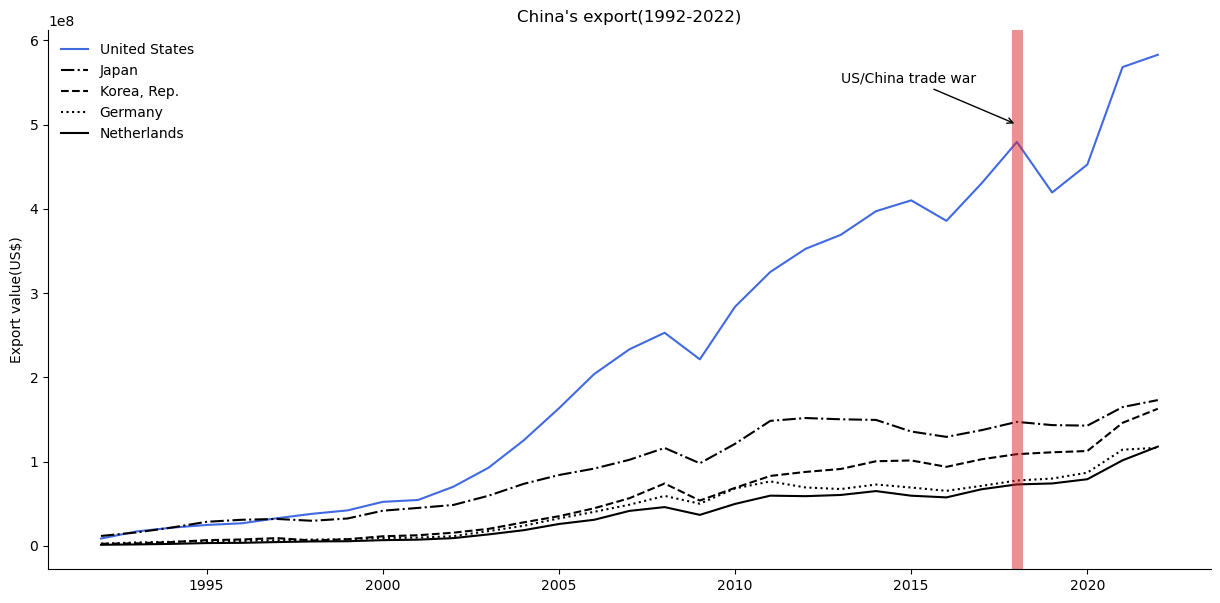

In [8]:
# plot the trend
fig, ax = plt.subplots(figsize = (15,7))

ax.plot(ce.columns, ce.loc['United States'], label = 'United States', color = '#4169E1')
ax.plot(ce.columns, ce.loc['Japan'], label = 'Japan', ls = '-.', color = 'black')
ax.plot(ce.columns, ce.loc['Korea, Rep.'], label = 'Korea, Rep.', ls = '--', color = 'black')
ax.plot(ce.columns, ce.loc['Germany'], label = 'Germany', ls = ':', color = 'black')
ax.plot(ce.columns, ce.loc['Netherlands'], label = 'Netherlands', color = 'black')

ax.set_xticks(['1995', '2000', '2005', '2010', '2015', '2020'])
ax.set_ylabel('Export value(US$)')
ax.set_title("China's export(1992-2022)")
ax.legend(frameon = False)
ax.axvline(x = '2018', linewidth=8, color='#d62728', alpha = 0.5)
#ax.text('2017', 5.5e+08, 'US/China\ntrade war')
ax.annotate('US/China trade war', 
            xy=('2018', 5e+08), 
            xytext=('2013', 5.5e+08), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'}
           ) 

sns.despine()
#plt.savefig("China's export(1992-2022).pdf", format="pdf", bbox_inches="tight")
plt.show()

In [9]:
# calculate the change
ce_change = ce.pct_change(axis=1)*100
ce_change.drop('1992', axis = 1, inplace = True)
ce_change.columns = [str(year) + '_change' for year in range(1993, 2023)]

In [10]:
ce_change

,1993_change,1994_change,1995_change,1996_change,1997_change,1998_change,1999_change,2000_change,2001_change,2002_change,...,2013_change,2014_change,2015_change,2016_change,2017_change,2018_change,2019_change,2020_change,2021_change,2022_change
Country,,,,,,,,,,,,,,,,,,,,,
"Korea, Rep.",18.944348,53.904936,51.911202,12.142262,21.693985,-31.504425,24.891767,44.632904,10.860559,24.090074,...,3.982020,10.057045,0.949766,-7.483020,9.600844,5.893033,2.039670,1.353290,29.744178,11.436944
"Hong Kong, China",-41.219971,46.763739,11.193934,-8.551631,33.053307,-11.513805,-4.850187,20.767741,4.544103,25.615783,...,18.875690,-5.571090,-8.982762,-13.075943,-2.799328,8.055213,-7.582412,-2.552424,27.516577,-14.123719
Canada,83.374687,16.629846,9.704189,5.444091,17.981015,11.557700,14.391604,29.794958,5.945195,28.631267,...,3.880938,2.693538,-1.936550,-7.172756,14.876951,12.040585,5.059890,13.978016,19.764134,6.527967
Thailand,-16.127963,54.469339,51.107845,-28.372075,19.630808,-16.187201,14.078449,56.303634,4.183953,26.538565,...,4.875939,4.802643,11.670068,-2.893835,3.654910,11.252715,6.311107,10.811351,35.072075,15.023554
Malaysia,9.129963,58.677844,14.613324,6.972804,40.248351,-16.934801,4.845578,53.243433,25.585040,54.425797,...,25.748700,0.920507,-5.119369,-14.370419,10.759528,8.783281,14.910531,7.976385,35.707332,22.651746
"Other Asia, nes",111.445146,53.030885,37.850872,-9.562135,21.297055,13.839638,2.090758,27.573091,-0.752770,31.695372,...,10.486857,13.886651,-2.989462,-10.375672,9.314584,10.634596,13.342713,9.092522,29.636817,4.739708
Singapore,10.559690,13.928456,36.847570,7.088677,15.325854,-8.775104,14.155461,27.960345,0.515015,20.610698,...,12.470256,6.718710,6.197489,-14.336035,1.176169,8.936885,11.736453,5.157621,-6.169280,50.116479
Australia,60.523889,40.266490,9.296421,2.875806,22.908579,15.015867,14.353137,26.789531,4.099571,28.452409,...,-0.479016,4.238644,2.964696,-7.502541,11.146601,14.218349,1.900471,10.861833,22.490974,20.358235
Italy,19.161576,21.874695,29.960353,-11.172644,21.908839,15.121777,13.668242,29.770450,4.985064,20.941210,...,0.376703,11.663795,-3.206198,-5.295383,10.771773,13.601554,1.049613,-1.806567,31.582497,17.545108


In [11]:
ce.loc['United States'].head()

1992    8.599372e+06
1993    1.697267e+07
1994    2.147484e+07
1995    2.472863e+07
1996    2.670563e+07
Name: United States, dtype: float64

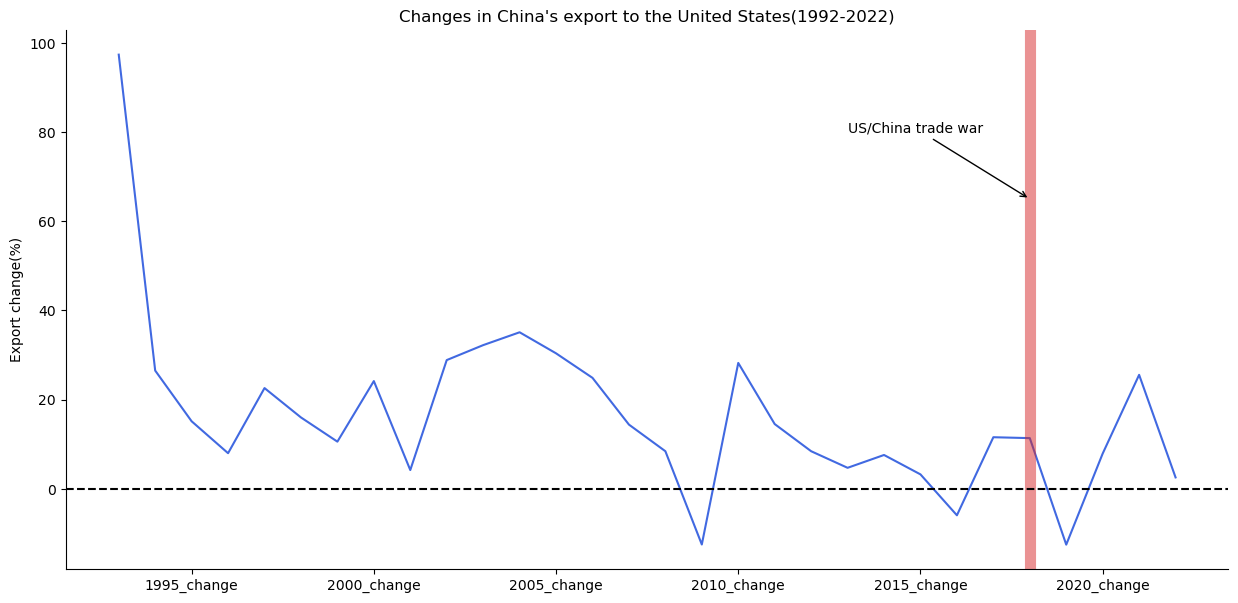

In [12]:
# plot the volume change
fig, ax = plt.subplots(figsize = (15,7))

ax.plot(ce_change.columns, ce_change.loc['United States'], label = 'United States', color = '#4169E1')
#ax.plot(ce_change.columns, ce_change.loc['United Kingdom'], label = 'United Kingdom', color = 'black')
#ax.plot(ce_change.columns, ce_change.loc['Japan'], label = 'Japan', ls = '-.', color = 'black')
#ax.plot(ce_change.columns, ce_change.loc['Korea, Rep.'], label = 'Korea, Rep.', ls = '--', color = 'black')
#ax.plot(ce_change.columns, ce_change.loc['Germany'], label = 'Germany', ls = ':', color = 'black')

ax.set_xticks(['1995_change', '2000_change', '2005_change', '2010_change', '2015_change', '2020_change'])
ax.set_ylabel('Export change(%)')
ax.set_title("Changes in China's export to the United States(1992-2022)")
ax.axvline(x = '2018_change', linewidth=8, color='#d62728', alpha = 0.5)
ax.axhline(y = 0, color='black', ls = "--")
#ax.legend(frameon = False)
ax.annotate('US/China trade war', 
            xy=('2018_change', 65), 
            xytext=('2013_change', 80), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'}
           ) 

sns.despine()
#plt.savefig("Change in China's export to US(1992-2022).pdf", format="pdf", bbox_inches="tight")
plt.show()

## Select partner country for the import of US

### 1992-2022 data

In [13]:
ui = pd.read_excel('us_import_92_22.xlsx', sheet_name = 'Partner-Timeseries')
ui.drop(['Reporter Name', 'Trade Flow', 'Product Group', 'Indicator'], axis = 1, inplace = True)
ui.rename(columns = {'Partner Name':'Country'}, inplace = True)
ui.head()

,Country,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Argentina,1369500.672,1297639.936,1819572.224,1881129.984,2450563.960,2.379928e+06,2.441025e+06,2.793390e+06,3.099473e+06,...,4.870332e+06,4.453638e+06,4.187110e+06,4.911097e+06,5.001495e+06,5.032017e+06,5.120074e+06,4.378126e+06,5.392177e+06,7.291539e+06
1,Belize,61944.080,57527.528,54172.044,55937.888,72562.350,8.227428e+04,7.035948e+04,8.440699e+04,9.355538e+04,...,1.339259e+05,1.035311e+05,8.146101e+04,5.805860e+04,2.806184e+05,2.290270e+05,6.016959e+04,5.391075e+04,7.021747e+04,6.508584e+04
2,Benin,10258.025,16931.872,11346.474,10852.834,19547.066,9.053803e+03,4.419292e+03,2.023699e+04,2.439701e+03,...,3.220919e+03,5.534069e+03,5.111324e+03,7.272705e+03,1.811363e+04,1.943858e+04,8.802005e+03,5.824399e+03,8.461219e+03,3.505031e+03
3,Bhutan,70.610,89.216,45.708,144.915,106.893,1.053010e+03,1.129581e+03,4.609000e+02,8.275080e+02,...,5.718370e+02,3.064820e+02,3.621451e+03,4.272858e+03,1.222537e+03,8.424970e+02,6.186260e+02,4.349120e+02,3.778860e+02,3.168300e+02
4,Brazil,8144448.000,8021263.360,9307302.912,9428286.464,9296194.802,1.014945e+07,1.064221e+07,1.189636e+07,1.385252e+07,...,2.865829e+07,3.160711e+07,2.851787e+07,2.704700e+07,3.055194e+07,3.228617e+07,3.207946e+07,2.442164e+07,3.284301e+07,4.137052e+07


In [14]:
years = ['1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022']

In [15]:
# calculate the quantile
quan = ui[years].quantile([0.25, 0.5, 0.75, 0.8, 0.9])
quan

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0.25,3.340916e+03,4.364123e+03,4.612179e+03,6.739405e+03,6.731237e+03,8.829923e+03,6.745051e+03,9.488214e+03,6.926378e+03,6.959343e+03,...,9.756930e+03,1.064922e+04,1.247837e+04,1.169635e+04,1.339046e+04,1.343922e+04,1.185214e+04,8.942181e+03,1.092003e+04,1.161990e+04
0.50,4.602104e+04,5.107343e+04,6.250518e+04,6.503998e+04,8.112749e+04,8.976902e+04,1.127295e+05,1.141219e+05,1.398888e+05,1.403435e+05,...,1.837154e+05,2.096574e+05,1.667433e+05,1.558196e+05,1.533959e+05,2.008026e+05,1.523246e+05,1.455050e+05,2.001420e+05,2.328740e+05
0.75,7.982678e+05,8.622063e+05,1.141618e+06,1.116628e+06,1.342914e+06,1.711179e+06,1.511824e+06,1.805336e+06,2.001865e+06,1.861957e+06,...,3.754883e+06,3.935445e+06,3.370733e+06,3.408739e+06,3.623329e+06,3.997522e+06,4.018326e+06,2.922300e+06,4.145997e+06,5.270743e+06
0.80,1.307255e+06,1.477916e+06,1.775543e+06,1.898912e+06,2.121299e+06,2.391691e+06,2.446936e+06,2.767965e+06,2.928264e+06,2.917498e+06,...,5.665629e+06,5.475305e+06,4.768373e+06,4.780444e+06,5.136641e+06,5.357637e+06,5.417076e+06,5.098727e+06,6.480054e+06,7.305026e+06
0.90,4.888063e+06,5.599181e+06,6.191786e+06,6.536724e+06,7.261350e+06,8.107426e+06,8.696587e+06,9.634234e+06,1.047167e+07,9.766754e+06,...,1.989384e+07,2.138356e+07,1.759591e+07,1.653831e+07,1.762725e+07,2.085220e+07,1.941056e+07,1.586012e+07,1.940598e+07,2.369252e+07


In [16]:
# select the 90% quantile
ui.set_index('Country', inplace = True)
for y in years:
    ui = ui[ui[y] > quan.loc[0.90, y]]

### now we have selected the 90% quantile for export data

In [17]:
country_selected = list(ui.index)
print(country_selected)

['Brazil', 'France', 'Canada', 'China', 'Korea, Rep.', 'Italy', 'Japan', 'Thailand', 'Malaysia', 'Mexico', 'Germany', 'Other Asia, nes', 'United Kingdom']


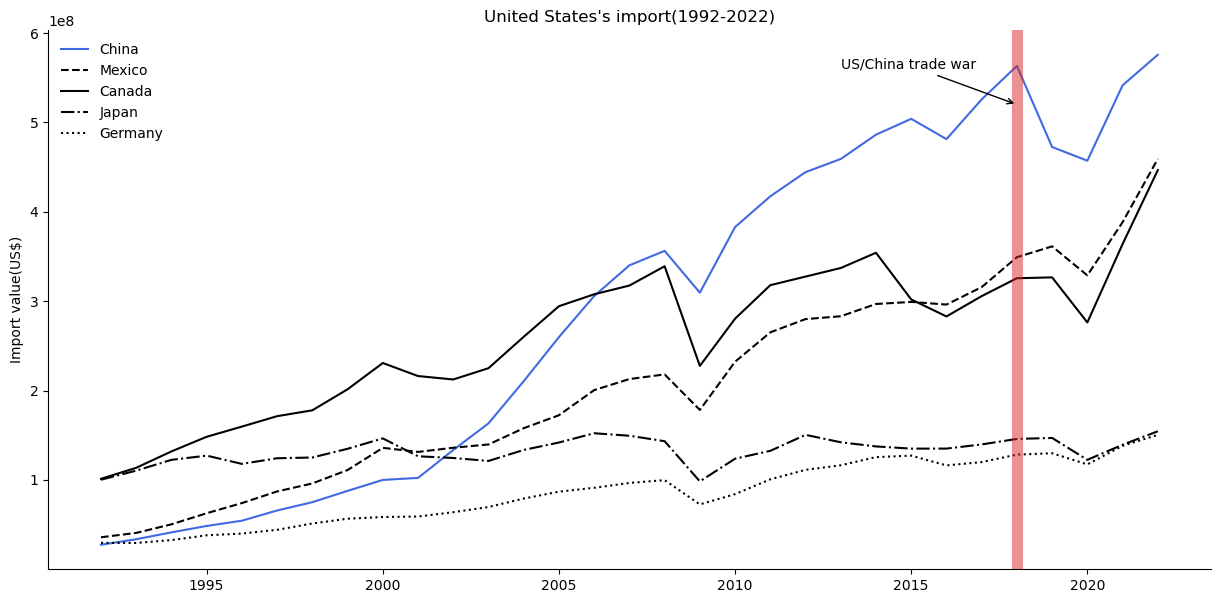

In [18]:
# plot the trend
fig, ax = plt.subplots(figsize = (15,7))

ax.plot(ui.columns, ui.loc['China'], label = 'China', color = '#4169E1')
ax.plot(ui.columns, ui.loc['Mexico'], label = 'Mexico', ls = '--', color = 'black')
ax.plot(ui.columns, ui.loc['Canada'], label = 'Canada', color = 'black')
ax.plot(ui.columns, ui.loc['Japan'], label = 'Japan', ls = '-.', color = 'black')
ax.plot(ui.columns, ui.loc['Germany'], label = 'Germany', ls = ':', color = 'black')

ax.set_xticks(['1995', '2000', '2005', '2010', '2015', '2020'])
ax.set_ylabel('Import value(US$)')
ax.set_title("United States's import(1992-2022)")
ax.axvline(x = '2018', linewidth=8, color='#d62728', alpha = 0.5)
ax.legend(frameon = False)
ax.annotate('US/China trade war', 
            xy=('2018', 5.2e+08), 
            xytext=('2013', 5.6e+08), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'}
           ) 

sns.despine()
#plt.savefig("US's import(1992-2022).pdf", format="pdf", bbox_inches="tight")
plt.show()

In [19]:
# calculate the change
ui_change = ui.pct_change(axis=1)*100
ui_change.drop('1992', axis = 1, inplace = True)
ui_change.columns = [str(year) + '_change' for year in range(1993, 2023)]

In [20]:
ui_change

,1993_change,1994_change,1995_change,1996_change,1997_change,1998_change,1999_change,2000_change,2001_change,2002_change,...,2013_change,2014_change,2015_change,2016_change,2017_change,2018_change,2019_change,2020_change,2021_change,2022_change
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,-1.512498,16.032880,1.299878,-1.401015,9.178579,4.855026,11.784679,16.443344,4.431612,15.371730,...,-13.821703,10.289619,-9.773901,-5.157685,12.958697,5.676315,-0.640230,-23.871415,34.483226,25.964459
France,2.811105,10.364373,2.611347,8.074134,11.157902,15.888209,7.324899,12.371259,2.004434,-5.169170,...,9.420373,2.599112,2.333764,-2.246707,4.779733,7.136764,9.082386,-24.994884,17.817775,14.321616
Canada,12.187689,16.143472,12.403090,7.697227,7.288724,3.843914,13.217871,14.586947,-6.317587,-1.773879,...,2.938460,5.056186,-14.746831,-6.300363,8.033545,6.555225,0.290161,-15.440479,31.756175,22.731020
China,22.670014,22.785382,17.316901,12.144719,20.985091,14.105892,16.885558,13.942208,2.254095,30.550437,...,3.312854,5.922001,3.646312,-4.507223,9.236090,7.120753,-16.111098,-3.238483,18.454449,6.307435
"Korea, Rep.",2.399563,14.598005,22.166052,-6.400658,2.147073,4.232397,30.920250,24.120842,-12.717925,4.903799,...,5.924091,11.041734,3.206090,-2.914484,2.131424,3.787434,4.918016,-2.071436,26.204575,22.317063
Italy,7.677716,11.661850,12.062489,9.802279,6.217106,8.577999,6.530958,7.267963,-4.998565,6.539803,...,4.408116,8.755085,4.778882,2.604092,10.118464,9.612190,4.414421,-13.182439,23.627764,14.004723
Japan,10.178113,10.913432,3.860021,-7.258499,5.343043,0.663055,7.819677,8.606852,-13.657949,-1.507960,...,-5.523742,-3.259453,-1.803614,0.034987,3.451490,4.415026,0.734779,-16.662998,13.802369,10.801004
Thailand,13.315636,20.227315,9.771136,-0.472290,10.656667,7.007092,8.482147,8.114414,-10.119604,6.444101,...,0.291263,3.530458,5.712067,2.823762,5.761893,2.505605,5.305459,12.773119,28.574726,24.953158
Malaysia,27.083858,32.008426,24.705618,1.945836,1.048110,5.376829,13.171638,15.747051,-12.624457,10.707546,...,5.033669,11.138505,11.589920,7.460474,2.120568,5.330738,3.401595,9.245180,27.591450,-1.632655


In [21]:
ui.loc['China'].head()

1992    2.745024e+07
1993    3.367321e+07
1994    4.134578e+07
1995    4.850559e+07
1996    5.439646e+07
Name: China, dtype: float64

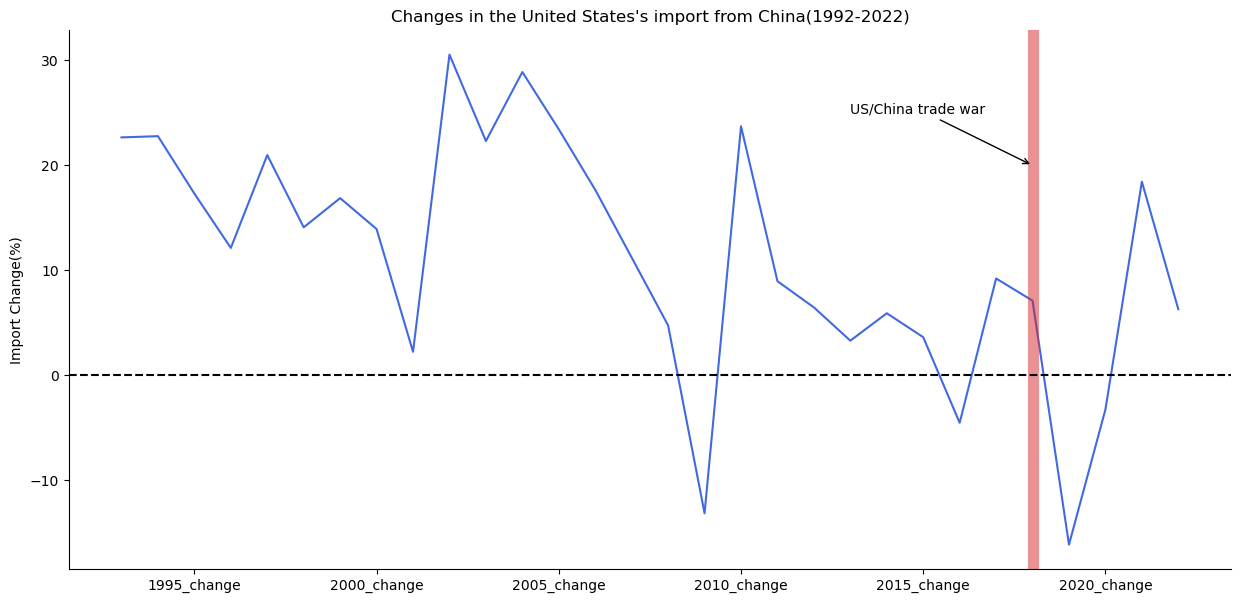

In [22]:
# plot the volume change
fig, ax = plt.subplots(figsize = (15,7))

ax.plot(ui_change.columns, ui_change.loc['China'], label = 'China', color = '#4169E1')
#ax.plot(ui_change.columns, ui_change.loc['United Kingdom'], label = 'United Kingdom', color = 'black')
#ax.plot(ui_change.columns, ui_change.loc['Japan'], label = 'Japan', ls = '-.', color = 'black')
#ax.plot(ui_change.columns, ui_change.loc['Korea, Rep.'], label = 'Korea, Rep.', ls = '--', color = 'black')
#ax.plot(ui_change.columns, ui_change.loc['Germany'], label = 'Germany', ls = ':', color = 'black')

ax.set_xticks(['1995_change', '2000_change', '2005_change', '2010_change', '2015_change', '2020_change'])
ax.set_ylabel('Import Change(%)')
ax.set_title("Changes in the United States's import from China(1992-2022)")
ax.axvline(x = '2018_change', linewidth=8, color='#d62728', alpha = 0.5)
ax.axhline(y = 0, color='black', ls = "--")
#ax.legend(frameon = False)
ax.annotate('US/China trade war', 
            xy=('2018_change', 20), 
            xytext=('2013_change', 25), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'}
           ) 

sns.despine()
#plt.savefig("Change in US's import from China(1992-2022).pdf", format="pdf", bbox_inches="tight")
plt.show()

## Detailed commodity data for selected countries

In [23]:
# check the encoding of the file
with open('us_import_2014.csv', 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [24]:
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

### China's export

In [25]:
china_export = []

for y in years:
    data = pd.read_csv(f'china_export_{y}.csv', encoding = 'ISO-8859-1')
    china_export.append(data)
    
china_export_data = pd.concat(china_export, ignore_index=True)

C:\Users\karry\AppData\Local\Temp\ipykernel_15744\3101977704.py:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'china_export_{y}.csv', encoding = 'ISO-8859-1')
C:\Users\karry\AppData\Local\Temp\ipykernel_15744\3101977704.py:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'china_export_{y}.csv', encoding = 'ISO-8859-1')
C:\Users\karry\AppData\Local\Temp\ipykernel_15744\3101977704.py:4: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'china_export_{y}.csv', encoding = 'ISO-8859-1')
C:\Users\karry\AppData\Local\Temp\ipykernel_15744\3101977704.py:4: DtypeWarning: Columns (20,30,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'china_export_{y}.csv', encoding = 'ISO-8859-1')
C:\Users\karry\AppData\Local\Temp\ipyk

In [26]:
china_export_data.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,A,20140101,2014,52,2014,156,CHN,China,X,Export,...,False,NaN,False,NaN,5807513032,5807513032,0,True,False,NaN
1,A,20140101,2014,52,2014,156,CHN,China,X,Export,...,False,NaN,False,NaN,5017247232,5017247232,0,True,False,NaN
2,A,20140101,2014,52,2014,156,CHN,China,X,Export,...,False,NaN,False,NaN,14458377407,14458377407,0,True,False,NaN
3,A,20140101,2014,52,2014,156,CHN,China,X,Export,...,False,NaN,False,NaN,4614451178,4614451178,0,True,False,NaN
4,A,20140101,2014,52,2014,156,CHN,China,X,Export,...,False,NaN,False,NaN,35746769401,35746769401,0,True,False,NaN


In [27]:
china_export_data = china_export_data[['refPeriodId', 'partnerISO', 'partnerCode', 'isOriginalClassification', 'cmdCode', 'fobvalue']]

In [28]:
china_export_data.columns = ['year', 'country', 'iso', 'hs_code', 'commodity', 'export_value']

In [29]:
china_export_data.head()

,year,country,iso,hs_code,commodity,export_value
0,2014,Australia,AUS,85,Electrical machinery and equipment and parts t...,5807513032
1,2014,Canada,CAN,85,Electrical machinery and equipment and parts t...,5017247232
2,2014,Germany,DEU,85,Electrical machinery and equipment and parts t...,14458377407
3,2014,Italy,ITA,85,Electrical machinery and equipment and parts t...,4614451178
4,2014,Japan,JPN,85,Electrical machinery and equipment and parts t...,35746769401


In [30]:
china_export_data_pivot = china_export_data.pivot_table(
    index=['country', 'iso', 'hs_code', 'commodity'],
    columns='year',
    values='export_value',
    aggfunc='sum'
)

In [31]:
china_export_data_pivot.reset_index(inplace = True)

In [32]:
china_export_data_pivot.head()

year,country,iso,hs_code,commodity,2014,2015,2016,2017,2019,2020,2021,2022,2023
0,Australia,AUS,2,Meat and edible meat offal,NaN,NaN,NaN,194710.0,272000.0,NaN,NaN,NaN,NaN
1,Australia,AUS,3,"Fish and crustaceans, molluscs and other aquat...",NaN,NaN,NaN,135344199.0,284109784.0,NaN,NaN,NaN,93294054.0
2,Australia,AUS,4,Dairy produce; birds' eggs; natural honey; edi...,NaN,NaN,NaN,19105071.0,34148614.0,NaN,NaN,NaN,NaN
3,Australia,AUS,5,Animal originated products; not elsewhere spec...,NaN,NaN,NaN,1558076.0,1922252.0,NaN,NaN,NaN,NaN
4,Australia,AUS,6,"Trees and other plants, live; bulbs, roots and...",NaN,NaN,NaN,8555609.0,25133466.0,NaN,NaN,NaN,NaN


In [33]:
china_export_data_pivot.shape

(127092, 13)

In [34]:
china_export_data_pivot.isna().sum()

year
country          0
iso              0
hs_code          0
commodity        0
2014         62986
2015         73098
2016         88515
2017         67300
2019         60573
2020         61354
2021         61093
2022         57713
2023         58582
dtype: int64

In [35]:
# set missing value as 0
china_export_data_pivot.fillna(0, inplace=True)

### US's import

In [36]:
# read the data from 2014-2023
us_import = []

for y in years:
    data = pd.read_csv(f'us_import_{y}.csv', encoding = 'ISO-8859-1')
    us_import.append(data)
    
us_import_data = pd.concat(us_import, ignore_index=True)

C:\Users\karry\AppData\Local\Temp\ipykernel_15744\2949336691.py:5: DtypeWarning: Columns (20,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'us_import_{y}.csv', encoding = 'ISO-8859-1')
C:\Users\karry\AppData\Local\Temp\ipykernel_15744\2949336691.py:5: DtypeWarning: Columns (20,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'us_import_{y}.csv', encoding = 'ISO-8859-1')
C:\Users\karry\AppData\Local\Temp\ipykernel_15744\2949336691.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'us_import_{y}.csv', encoding = 'ISO-8859-1')
C:\Users\karry\AppData\Local\Temp\ipykernel_15744\2949336691.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'us_import_{y}.csv', encoding = 'ISO-8859-1')
C:\Users\karry\AppData\Local\Temp\ipykernel_15744\

In [37]:
us_import_data.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,A,20140101,2014,52,2014,842,USA,USA,M,Import,...,False,NaN,False,11657,NaN,11657,2,True,False,NaN
1,A,20140101,2014,52,2014,842,USA,USA,M,Import,...,False,NaN,False,4215,NaN,4215,2,True,False,NaN
2,A,20140101,2014,52,2014,842,USA,USA,M,Import,...,False,NaN,False,92297,NaN,92297,2,True,False,NaN
3,A,20140101,2014,52,2014,842,USA,USA,M,Import,...,False,NaN,False,14166,NaN,14166,2,True,False,NaN
4,A,20140101,2014,52,2014,842,USA,USA,M,Import,...,False,NaN,False,56665,NaN,56665,2,True,False,NaN


In [38]:
us_import_data = us_import_data[['refPeriodId', 'partnerISO', 'partnerCode', 'isOriginalClassification', 'cmdCode', 'fobvalue']]

In [39]:
us_import_data.columns = ['year', 'country', 'iso', 'hs_code', 'commodity', 'import_value']

In [40]:
us_import_data.head()

,year,country,iso,hs_code,commodity,import_value
0,2014,Brazil,BRA,700529,Glass; float glass and surface ground or polis...,11657
1,2014,Brazil,BRA,570110,Carpets and other textile floor coverings; kno...,4215
2,2014,Brazil,BRA,570210,Carpets and other textile floor coverings; wov...,92297
3,2014,Brazil,BRA,570231,Carpets and other textile floor coverings; wov...,14166
4,2014,Brazil,BRA,570241,Carpets and other textile floor coverings; wov...,56665


In [41]:
us_import_data['iso'].value_counts()

iso
CHN    57754
CAN    56322
DEU    52946
GBR    50653
ITA    50243
JPN    49743
MEX    49038
FRA    48475
IND    48275
KOR    43976
CHE    36813
BRA    36139
THA    34042
VNM    30803
MYS    26837
SGP    23482
IRL    23104
Name: count, dtype: int64

In [42]:
us_import_data_pivot = us_import_data.pivot_table(
    index=['country', 'iso', 'hs_code', 'commodity'],
    columns='year',
    values='import_value',
    aggfunc='sum'
)

In [43]:
us_import_data_pivot.reset_index(inplace = True)

In [44]:
us_import_data_pivot.head()

year,country,iso,hs_code,commodity,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,BRA,2,Meat and edible meat offal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376742632.0,NaN,NaN
1,Brazil,BRA,3,"Fish and crustaceans, molluscs and other aquat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,232570817.0,NaN,NaN
2,Brazil,BRA,4,Dairy produce; birds' eggs; natural honey; edi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127493970.0,119014047.0,NaN
3,Brazil,BRA,7,Vegetables and certain roots and tubers; edible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9045710.0,8994855.0,NaN
4,Brazil,BRA,8,"Fruit and nuts, edible; peel of citrus fruit o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,208910061.0,140832819.0,NaN


In [45]:
us_import_data_pivot.shape

(174760, 14)

In [46]:
us_import_data_pivot.isna().sum()

year
country           0
iso               0
hs_code           0
commodity         0
2014         105226
2015         104362
2016         103993
2017         103447
2018         103055
2019         102932
2020         103691
2021         102310
2022          99718
2023         100221
dtype: int64

In [47]:
# set missing value as 0
us_import_data_pivot.fillna(0, inplace=True)

## Figure

### Export and Import Value by Country in Bar Plot

C:\Users\karry\AppData\Local\Temp\ipykernel_15744\3234527039.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=china_export_data, x='country', y='export_value', hue='year', ci=None)


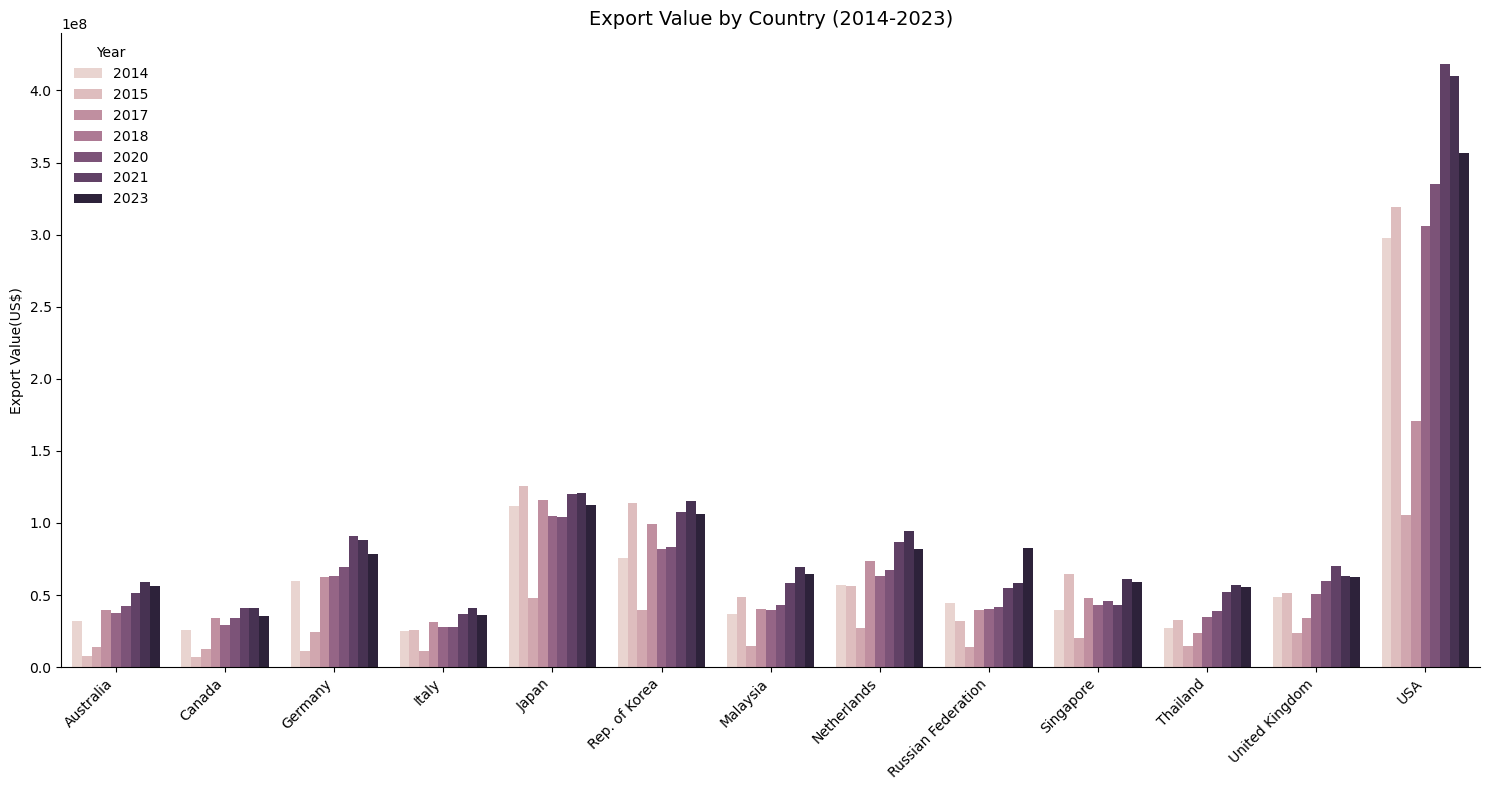

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(data=china_export_data, x='country', y='export_value', hue='year', ci=None)

ax.set_title('Export Value by Country (2014-2023)', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Export Value(US$)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', frameon = False)
plt.tight_layout()

sns.despine(ax=ax)
#plt.savefig("Export Value by Country (2014-2023).pdf", format="pdf", bbox_inches="tight")
plt.show()

C:\Users\karry\AppData\Local\Temp\ipykernel_15744\1811692057.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=us_import_data, x='country', y='import_value', hue='year', ci=None)


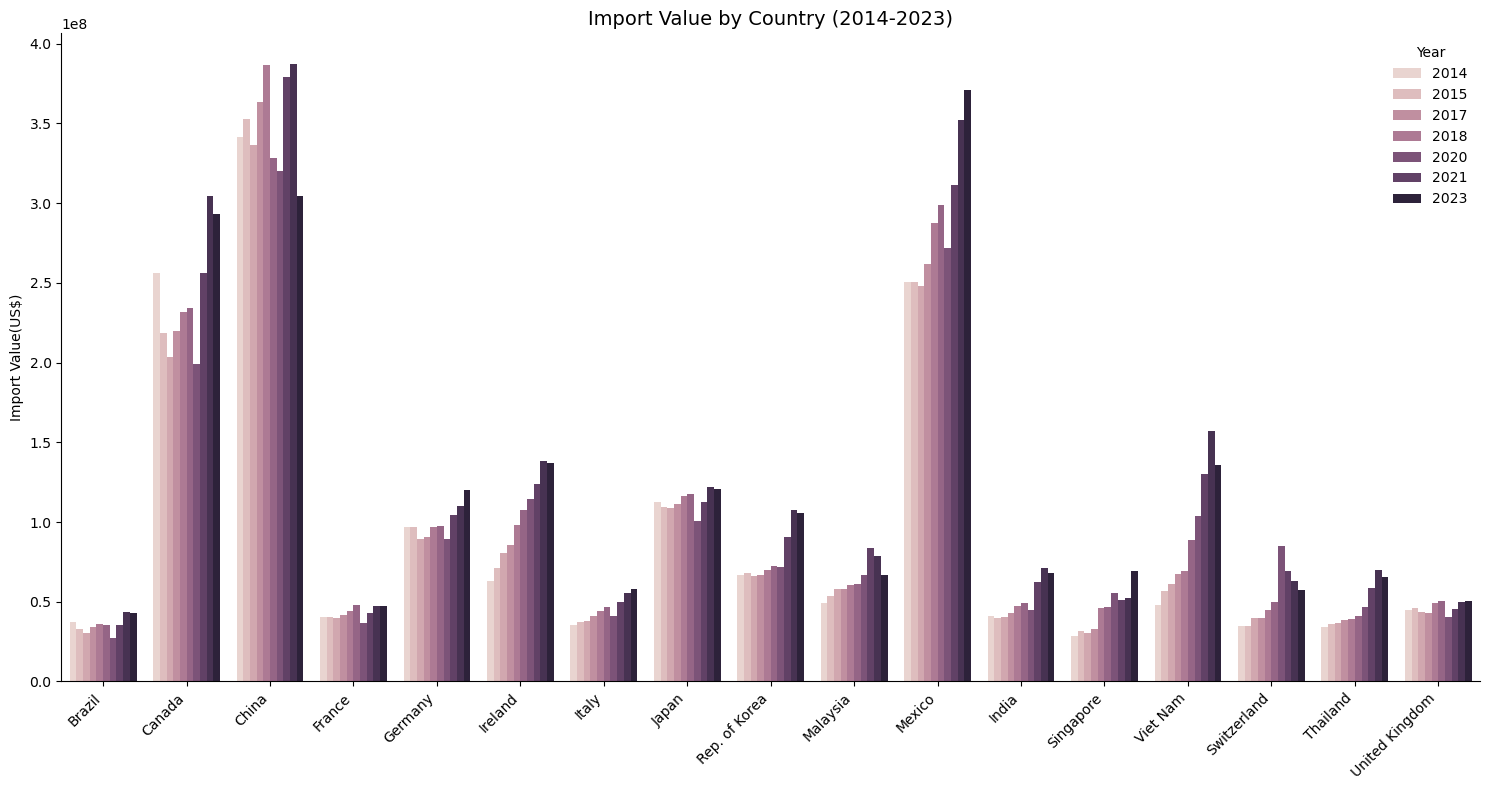

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(data=us_import_data, x='country', y='import_value', hue='year', ci=None)

ax.set_title('Import Value by Country (2014-2023)', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Import Value(US$)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', frameon = False)
plt.tight_layout()

sns.despine(ax=ax)
#plt.savefig("Import Value by Country (2014-2023).pdf", format="pdf", bbox_inches="tight")
plt.show()

### Grouped Bar Plot

#### Export

In [50]:
china_export_data_filtered = china_export_data[china_export_data['commodity'] != 'All Commodities']

In [51]:
ce_top_commodities = china_export_data_filtered.groupby('commodity')['export_value'].sum().nlargest(5).index
china_export_data_filtered = china_export_data_filtered[china_export_data_filtered['commodity'].isin(ce_top_commodities)]

In [52]:
ce_commodities = {
    'Electrical machinery and equipment and parts thereof; sound recorders and reproducers; television image and sound recorders and reproducers, parts and accessories of such articles': 'Electrical machinery and parts',
    'Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof': 'Machinery and mechanical appliances',
    'Telephone sets, including telephones for cellular networks or for other wireless networks; other apparatus for the transmission or reception of voice, images or other data (including wired/wireless networks), excluding items of 8443, 8525, 8527, or 8528': 'Telecommunication apparatus',
    'Automatic data processing machines and units thereof, magnetic or optical readers, machines for transcribing data onto data media in coded form and machines for processing such data, not elsewhere specified or included': 'Automatic data processing machines and related equipment',
    'Automatic data processing machines; portable, weighing not more than 10kg, consisting of at least a central processing unit, a keyboard and a display': 'Portable automatic data processing machines (weighing ≤ 10kg)'
}

In [53]:
china_export_data_filtered['commodity'] = china_export_data_filtered['commodity'].replace(ce_commodities)

In [54]:
china_export_data_sum = china_export_data_filtered.drop(['country', 'iso', 'hs_code'], axis = 1)

In [55]:
china_export_data_sum = china_export_data_sum.groupby(['year', 'commodity']).sum().reset_index()

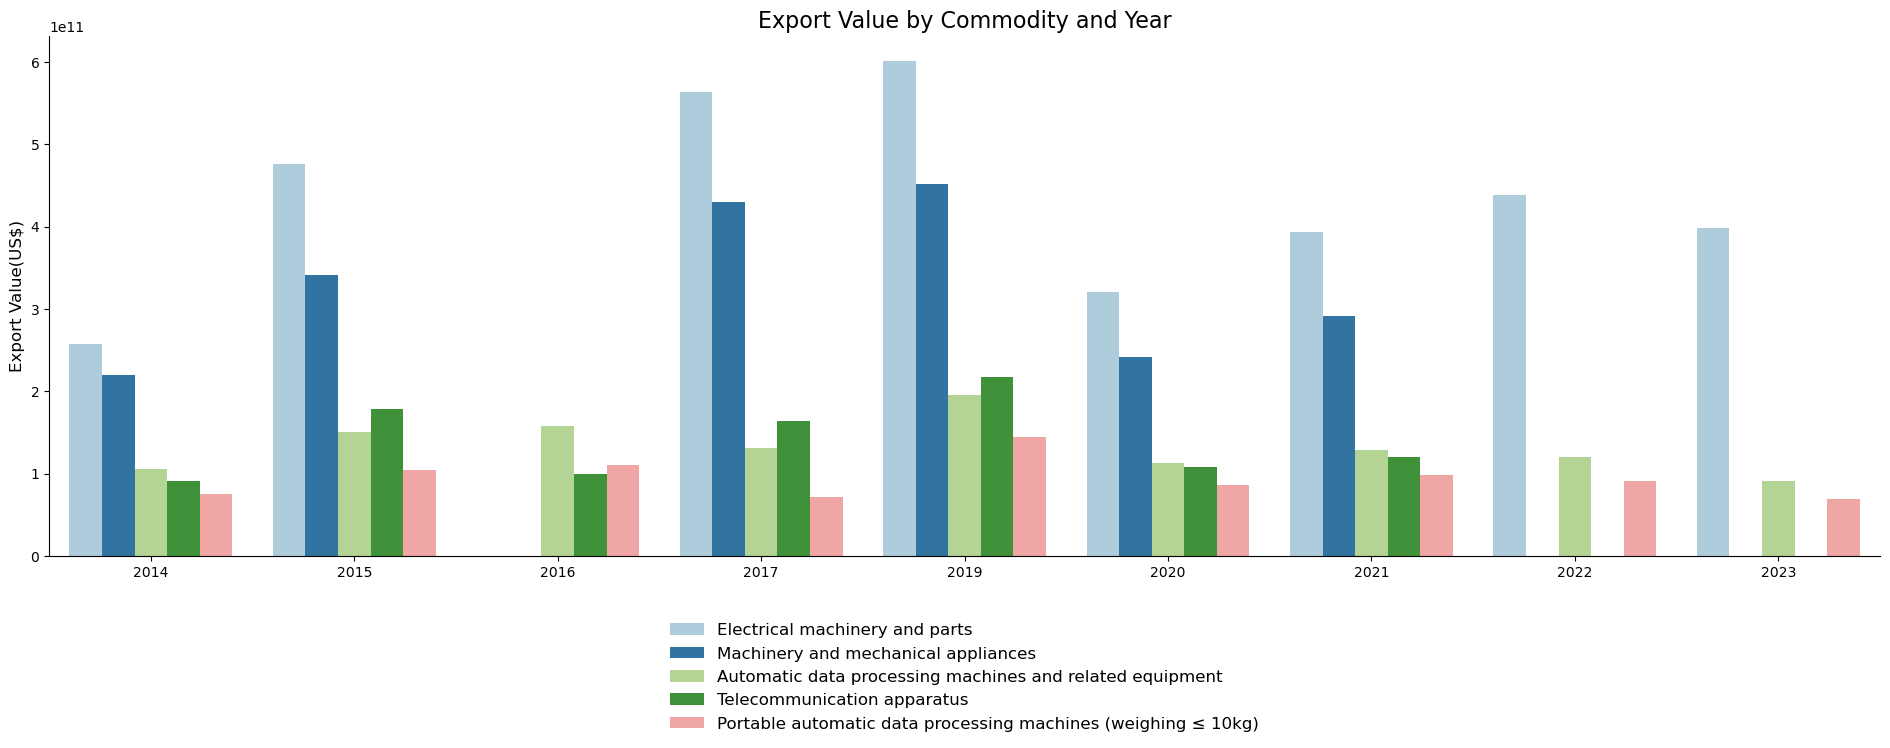

In [56]:
# all selected country
fig,ax = plt.subplots(figsize=(19, 6))

sns.barplot(data=china_export_data_sum.sort_values('export_value', ascending = False), x='year', 
            y='export_value', hue='commodity', palette='Paired', dodge=True, errorbar=None) 

ax.set_title('Export Value by Commodity and Year', fontsize=16)
ax.set_ylabel('Export Value(US$)', fontsize='large')
ax.set_xlabel('')

#plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(
    #title='Commodity', 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.1), 
    ncol=1, 
    fontsize='large',
    frameon = False
)

sns.despine(ax=ax)
#plt.savefig("Export Value by Commodity and Year.pdf", format="pdf", bbox_inches="tight")
plt.show()

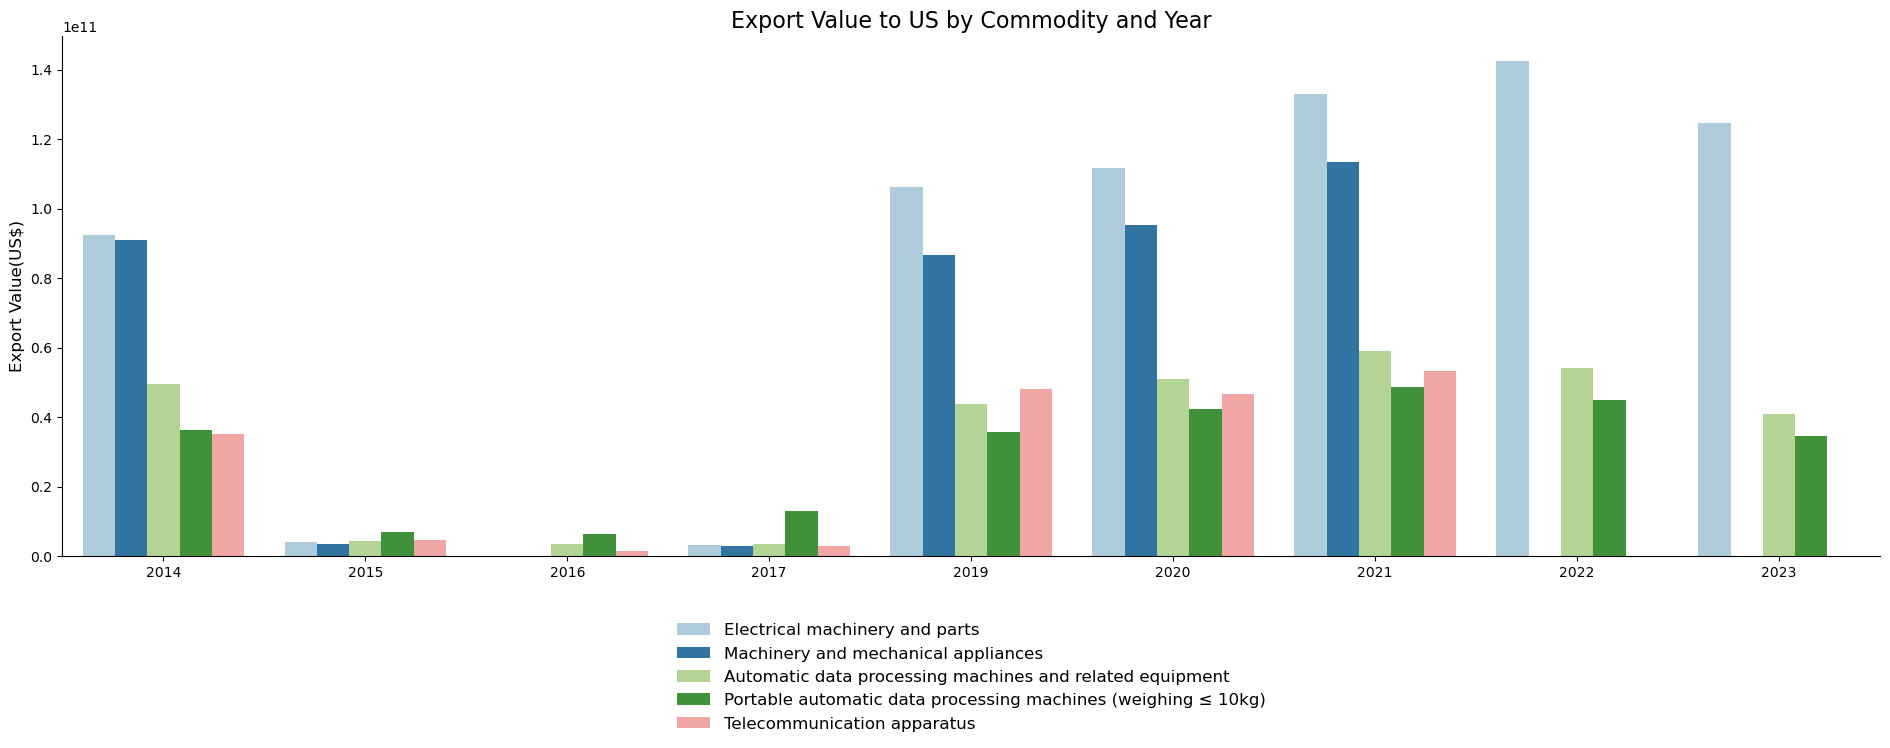

In [57]:
# US
usa_data = china_export_data_filtered[china_export_data_filtered['country'] == 'USA']

fig,ax = plt.subplots(figsize=(19, 6))

sns.barplot(data=usa_data.sort_values('export_value', ascending = False), x='year', 
            y='export_value', hue='commodity', palette='Paired', dodge=True, errorbar=None)

ax.set_title('Export Value to US by Commodity and Year', fontsize=16)
ax.set_ylabel('Export Value(US$)', fontsize='large')
ax.set_xlabel('')

#plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(
    #title='Commodity', 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.1), 
    ncol=1, 
    fontsize='large',
    frameon = False 
)

sns.despine(ax=ax)
#plt.savefig("Export to US by Commodity and Year.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Import

In [58]:
us_import_data_filtered = us_import_data[us_import_data['commodity'] != 'All Commodities']

In [59]:
ui_top_commodities = us_import_data_filtered.groupby('commodity')['import_value'].sum().nlargest(5).index
us_import_data_filtered = us_import_data_filtered[us_import_data_filtered['commodity'].isin(ui_top_commodities)]

In [60]:
ui_commodities = {
    'Motor cars and other motor vehicles; principally designed for the transport of persons (other than those of heading no. 8702), including station wagons and racing cars': 'Motor vehicles for transporting persons',
    'Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof': 'Machinery and mechanical appliances',
    'Electrical machinery and equipment and parts thereof; sound recorders and reproducers; television image and sound recorders and reproducers, parts and accessories of such articles': 'Electrical machinery and parts',
    'Vehicles; other than railway or tramway rolling stock, and parts and accessories thereof': 'Other vehicles and parts',
    'Commodities not specified according to kind': 'Unspecified commodities'
}

In [61]:
us_import_data_filtered['commodity'] = us_import_data_filtered['commodity'].replace(ui_commodities)

In [62]:
us_import_data_sum = us_import_data_filtered.drop(['country', 'iso', 'hs_code'], axis = 1)

In [63]:
us_import_data_sum = us_import_data_sum.groupby(['year', 'commodity']).sum().reset_index()

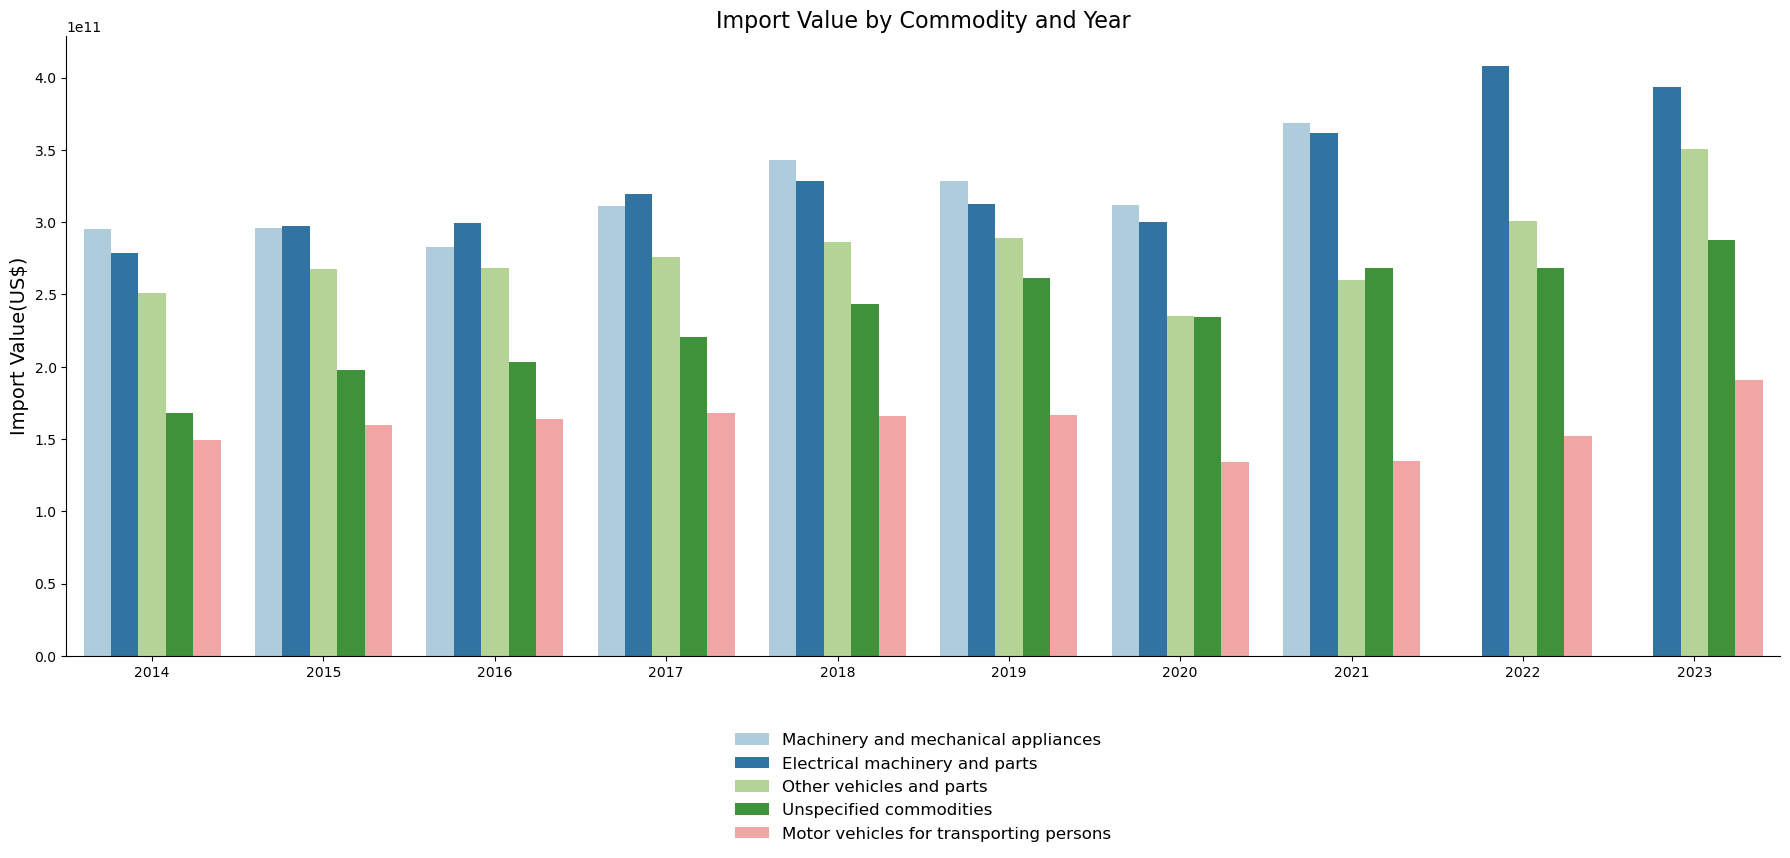

In [64]:
# all selected country
fig,ax = plt.subplots(figsize=(18, 7))

sns.barplot(data=us_import_data_sum.sort_values('import_value', ascending = False), x='year', 
            y='import_value', hue='commodity', palette='Paired', dodge=True, errorbar=None)

ax.set_title('Import Value by Commodity and Year', fontsize=16)
ax.set_ylabel('Import Value(US$)', fontsize=14)
ax.set_xlabel('')

#plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(
    #title='Commodity', 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.1), 
    ncol=1, 
    fontsize='large',
    frameon = False  
)

sns.despine(ax=ax)
#plt.savefig("Import Value by Commodity and Year.pdf", format="pdf", bbox_inches="tight")
plt.show()

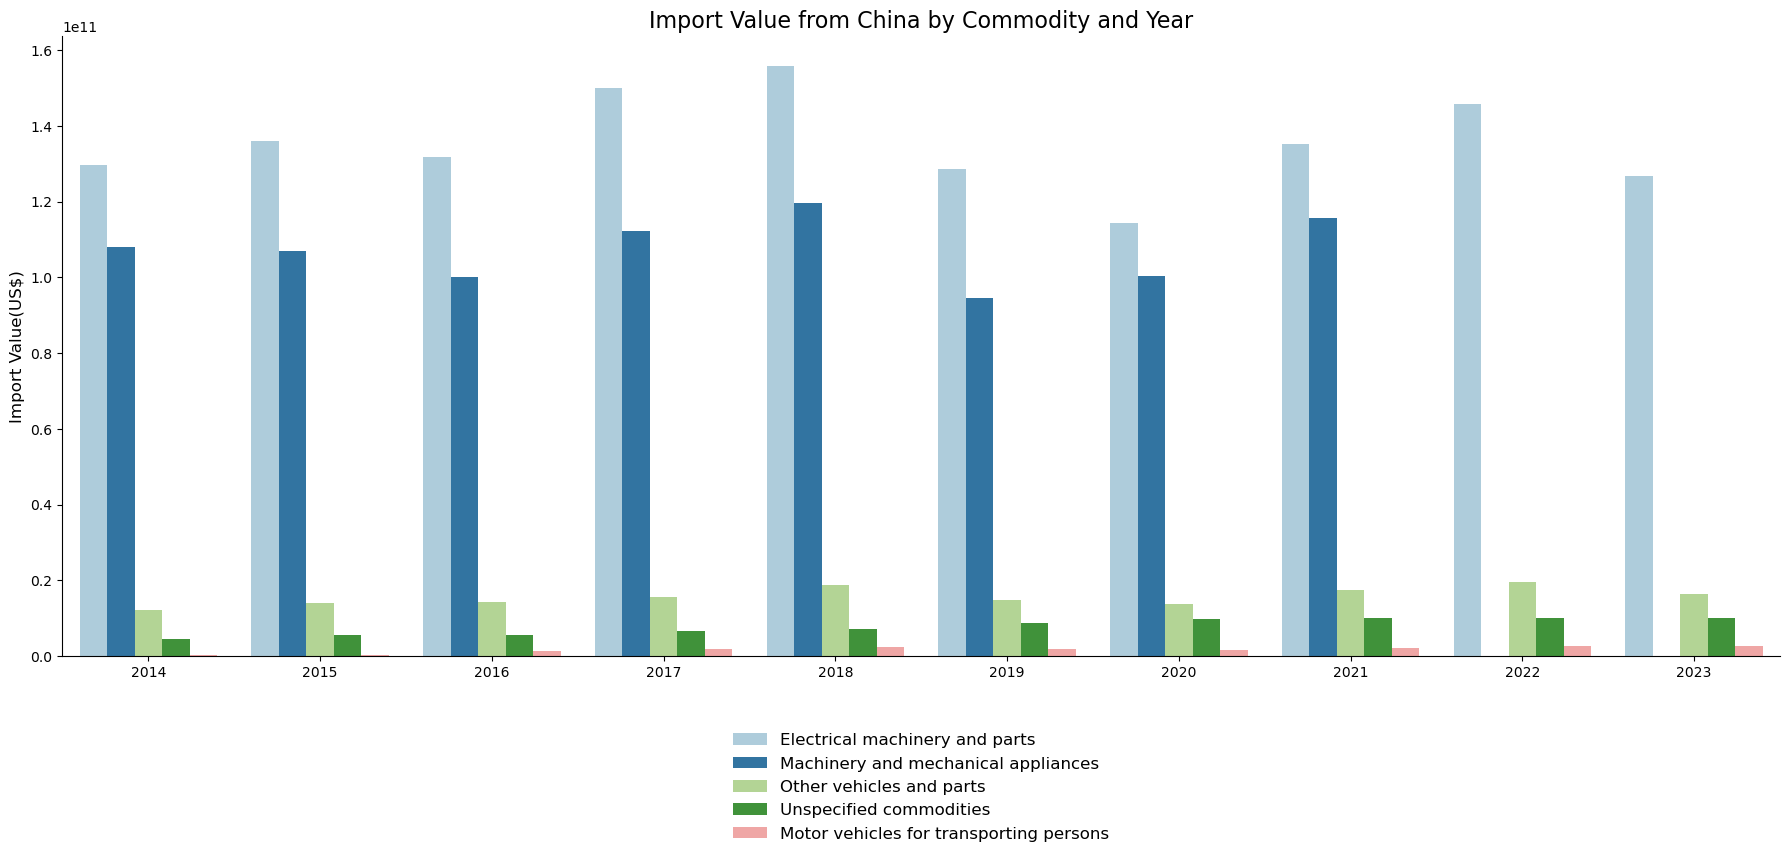

In [65]:
# China
china_data = us_import_data_filtered[us_import_data_filtered['country'] == 'China']

fig,ax = plt.subplots(figsize=(18, 7))

sns.barplot(data=china_data.sort_values('import_value', ascending = False), x='year', 
            y='import_value', hue='commodity', palette='Paired', dodge=True, errorbar=None)

ax.set_title('Import Value from China by Commodity and Year', fontsize=16)
ax.set_ylabel('Import Value(US$)', fontsize='large')
ax.set_xlabel('')

#plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(
    #title='Commodity', 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.1), 
    ncol=1, 
    fontsize='large',
    frameon = False  
)

sns.despine(ax=ax)
#plt.savefig("Import from Cina by Commodity and Year.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Map

In [66]:
world = gpd.read_file('ne_50m_admin_0_countries.zip')

In [67]:
world['TYPE'].value_counts()

TYPE
Sovereign country    185
Dependency            28
Country               19
Disputed               4
Indeterminate          4
Sovereignty            2
Name: count, dtype: int64

In [68]:
world = world[(world['TYPE'] == 'Sovereign country') | (world['TYPE'] == 'Country')]

In [69]:
countries = {
    'Democratic Republic of the Congo':'Congo, Dem. Rep.',
    'Republic of the Congo':'Congo, Rep.',
    'Egypt':'Egypt, Arab Rep.',
    'Ethiopia':'Ethiopia(excludes Eritrea)',
    'Gambia':'Gambia, The',
    'Iran':'Iran, Islamic Rep.',
    'Kyrgyzstan':'Kyrgyz Republic',
    'Laos':'Lao PDR',
    'North Korea':'Korea, Dem. Rep.',
    'South Korea':'Korea, Rep.',
    'Russia':'Russian Federation',
    'Cabo Verde':'Cape Verde',
    'Czechia':'Czech Republic',
    'Federated States of Micronesia':'Micronesia, Fed. Sts.',
    'Ivory Coast':'Cote d\'Ivoire',
    'Republic of Serbia':'Serbia, FR(Serbia/Montenegro)',
    'Slovakia':'Slovak Republic',
    'Saint Kitts and Nevis':'St. Kitts and Nevis',
    'Saint Lucia':'St. Lucia',
    'Saint Vincent and the Grenadines':'St. Vincent and the Grenadines',
    'São Tomé and Principe':'Sao Tome and Principe',
    'The Bahamas':'Bahamas, The',
    'Syria':'Syrian Arab Republic',
    'United Republic of Tanzania':'Tanzania',
    'Vatican':'Holy See',
    'eSwatini':'Eswatini',
    'United States of America':'United States'	
            }

In [70]:
world['ADMIN'] = world['ADMIN'].replace(countries)
world['SOVEREIGNT'] = world['SOVEREIGNT'].replace(countries)

In [71]:
export_china = pd.read_excel('export_china_share.xlsx', sheet_name = 'Partner-Timeseries')
export_china.drop(['Reporter Name', 'Trade Flow', 'Indicator'], axis = 1, inplace = True)
export_china.rename(columns = {'Partner Name':'Country'}, inplace = True)

In [72]:
import_us = pd.read_excel('import_us_share.xlsx', sheet_name = 'Partner-Timeseries')
import_us.drop(['Reporter Name', 'Trade Flow', 'Indicator'], axis = 1, inplace = True)
import_us.rename(columns = {'Partner Name':'Country'}, inplace = True)

In [73]:
export_china_gmap = pd.merge(left = world, right = export_china, left_on = 'SOVEREIGNT', right_on = 'Country', how = 'outer', indicator = True)
import_us_gmap = pd.merge(left = world, right = import_us, left_on = 'SOVEREIGNT', right_on = 'Country', how = 'outer', indicator = True)

In [74]:
export_china_gmap['_merge'].value_counts()

_merge
both          196
right_only     36
left_only       8
Name: count, dtype: int64

In [75]:
export_china_gmap[export_china_gmap['_merge'] == 'left_only']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,_merge
41,Admin-0 country,3.0,2.0,China,CH1,1.0,2.0,Country,1,China,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
42,Admin-0 country,3.0,4.0,China,CH1,1.0,2.0,Country,1,Macao S.A.R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
43,Admin-0 country,3.0,4.0,China,CH1,1.0,2.0,Country,1,Hong Kong S.A.R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
123,Admin-0 country,1.0,6.0,Liechtenstein,LIE,0.0,2.0,Sovereign country,1,Liechtenstein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
141,Admin-0 country,6.0,6.0,Monaco,MCO,0.0,2.0,Sovereign country,1,Monaco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
163,Admin-0 country,1.0,6.0,Northern Cyprus,CYN,0.0,2.0,Sovereign country,1,Northern Cyprus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
196,Admin-0 country,1.0,5.0,Somaliland,SOL,0.0,2.0,Sovereign country,1,Somaliland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
209,Admin-0 country,1.0,3.0,Taiwan,TWN,0.0,2.0,Sovereign country,1,Taiwan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [76]:
import_us_gmap['_merge'].value_counts()

_merge
both          198
right_only     50
left_only       6
Name: count, dtype: int64

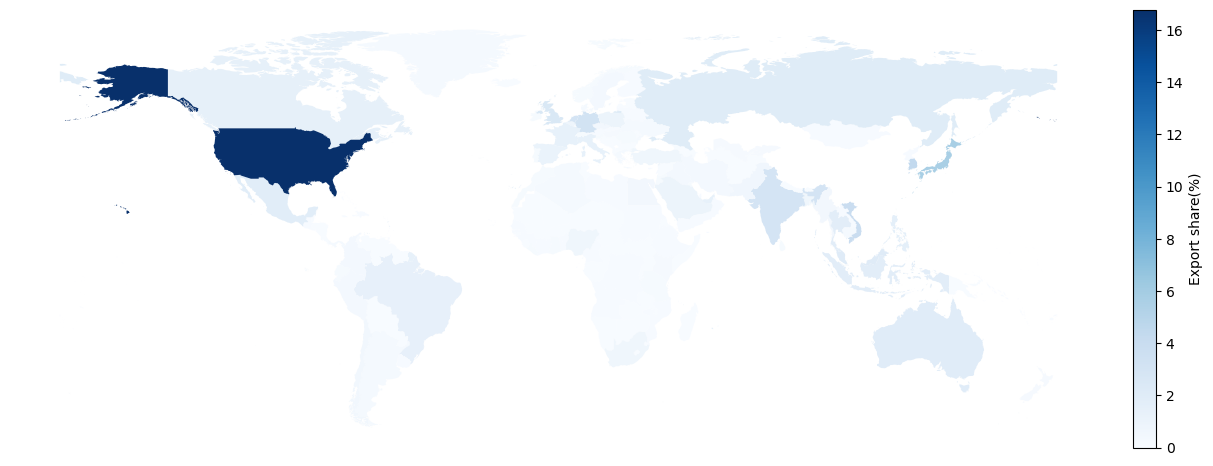

In [77]:
fig, gax = plt.subplots(figsize = (15,10))

divider = make_axes_locatable(gax)
cax = divider.append_axes("right", size="2%", pad=0.1)

export_china_gmap_2019 = export_china_gmap.dropna(subset=['2019'])
export_china_gmap_2019.plot(ax = gax, column='2019', cmap='Blues', cax=cax, legend=True,
              legend_kwds={'label': 'Export share(%)'})

gax.set_axis_off()
#plt.axis('off')

#plt.savefig("Export share in 2019.pdf", format="pdf", bbox_inches="tight")
plt.show()

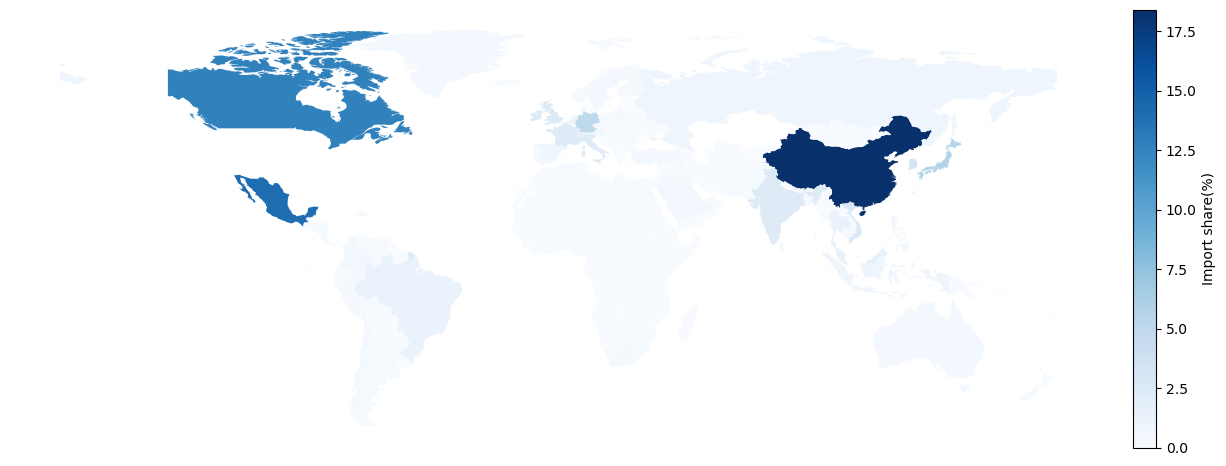

In [78]:
fig, gax = plt.subplots(figsize = (15,10))

divider = make_axes_locatable(gax)
cax = divider.append_axes("right", size="2%", pad=0.1)

import_us_gmap_2019 = import_us_gmap.dropna(subset=['2019'])
import_us_gmap_2019.plot(ax = gax, column='2019', cmap='Blues',cax=cax, legend=True,
              legend_kwds={'label': 'Import share(%)'})

gax.set_axis_off()

#plt.savefig("Import share in 2019.pdf", format="pdf", bbox_inches="tight")
plt.show()